<a href="https://colab.research.google.com/github/bomb1000/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 專題實作 #01: 鐵達尼號存活預測

## 環境準備

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


這個數據集描述了泰坦尼克號上的乘客信息。每一行代表一位乘客，每一列則包含以下信息：

PassengerId: 乘客ID<br>
Survived: 存活狀態 (1 = 存活, 0 = 未存活)<br>
Pclass: 船票等級 (1 = 一等, 2 = 二等, 3 = 三等)<br>
Name: 名字<br>
Sex: 性別<br>
Age: 年齡<br>
SibSp: 兄弟姐妹/配偶的數量<br>
Parch: 父母/子女的數量<br>
Ticket: 船票號碼<br>
Fare: 船票價格<br>
Cabin: 艙位號碼<br>
Embarked: 登船港口 (C = Cherbourg, Q = Queenstown, S = Southampton)<br>

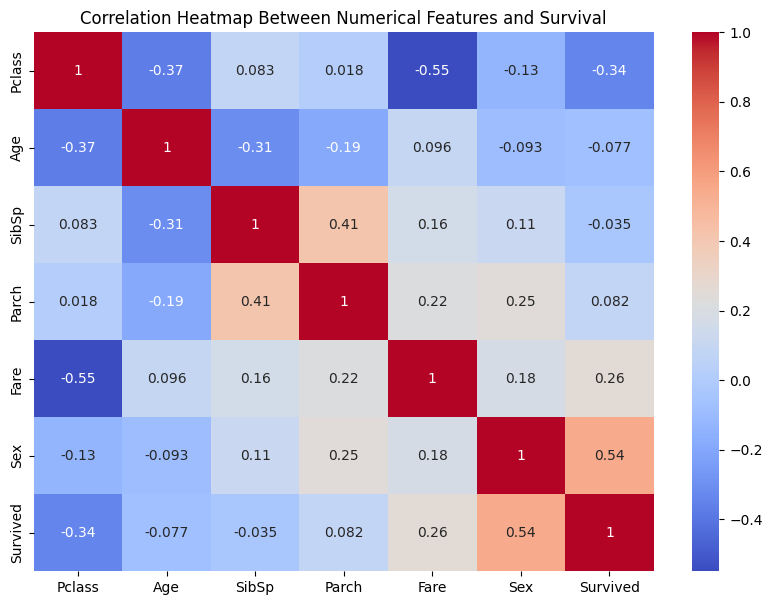

In [2]:
# Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical features
numerical_features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex"]

# Calculating the correlation matrix between numerical features and 'Survived'
correlation_matrix = df[numerical_features + ["Survived"]].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Between Numerical Features and Survival")
plt.show()


熱力圖展示了數值欄位與「是否生存」之間的相關性。在這個圖中，數值越接近1，表示正相關（一個變量增加，另一個也增加）；越接近-1，表示負相關（一個變量增加，另一個減少）；越接近0，表示關聯性低。

這裡有一些觀察結果：

Pclass（船票等級）與生存有明顯的負相關。這就像是在豪華餐廳的VIP區域和普通區域之間的差別，VIP區域的客人可能會得到更多的關注和優待。<br>
Fare（船票價格）與生存有正相關。這可能反映了付出更多的乘客享受更好的待遇，就像購買更昂貴的音樂會門票可以坐在更好的座位一樣。

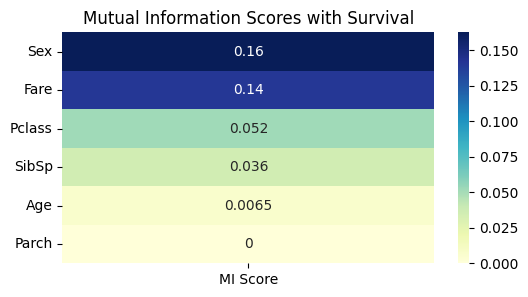

In [3]:
# Importing mutual_info_classif from sklearn to compute Mutual Information
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Preparing numerical features and target
X_numerical = df[numerical_features].copy()
X_numerical.fillna(X_numerical.mean(), inplace=True) # Filling missing values with mean
y = df["Survived"]

# Calculating MI scores
mi_scores = mutual_info_classif(X_numerical, y, random_state=42)

# Creating a DataFrame for better visualization
mi_scores_df = pd.DataFrame(mi_scores, index=numerical_features, columns=["MI Score"])

# Plotting the heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(mi_scores_df.sort_values(by="MI Score", ascending=False), annot=True, cmap="YlGnBu")
plt.title("Mutual Information Scores with Survival")
plt.show()


MI（互信息，Mutual Information）得分是另一種衡量兩個變數之間相關性的方法。它與皮爾森相關係數、斯皮爾曼等級相關係數和肯德爾的τ有一些重要區別。

### 互信息 (Mutual Information, MI)
- **衡量方式**：互信息衡量了兩個變數共享的信息量。它不僅能捕捉線性關係，還能捕捉非線性關係。
- **範圍**：0到正無窮（取決於數據）。0表示兩個變數獨立，值越大表示相關性越強。
- **適用情況**：當你想捕捉變數之間可能的非線性關係時，可以使用互信息。
- **比喻**：想像你正在試圖解密一個密碼。互信息告訴你這兩個變數共享了多少"秘密"信息。

### 和其他相關係數的區別
- **線性 vs 非線性**：皮爾森相關係數主要捕捉線性關係，而互信息可以捕捉線性和非線性的關係。
- **連續 vs 離散**：互信息可以應用於連續和離散變數，而其他相關係數通常用於連續變數或等級數據。
- **量度**：互信息量度的是變數之間共享的信息量，而其他相關係數量度的是變數之間的關係強度和方向。

### 何時使用MI？
如果你的數據可能存在非線性關係，或者你想要全面了解變數之間的所有潛在關係（不僅僅是線性或等級關係），那麼互信息可能是一個很好的選擇。

總的來說，互信息提供了一個更全面和靈活的方法來探索變數之間的關係，而不局限於特定的數據類型或關係類型。

這樣的解釋是否清楚呢？如果你有任何其他疑問或想深入了解某個方面，請隨時告訴我！

「關係大」這個概念通常涉及兩個變數之間的相關性強度。在統計學中，這可以通過計算相關係數來衡量。在我們剛才的分析中，我們使用了皮爾森相關係數。

讓我們用一個比喻來理解這個概念。你可以把兩個變數之間的關係想象成兩個舞伴之間的協同舞蹈：
- **正相關（接近1）**：當一個舞伴向前跳時，另一個也向前跳。他們的動作是同步的，彼此之間的協同程度很高。
- **負相關（接近-1）**：當一個舞伴向前跳時，另一個向後跳。他們的動作是反向的，但仍然有強烈的協同。
- **無關（接近0）**：兩個舞伴的動作沒有協同，就像隨機跳舞一樣。

在我們的例子中，一個絕對值較大的相關係數（無論正或負）表示「關係大」。具體來說，你可能會選擇一個閾值，例如0.5，來定義什麼樣的相關係數可以被認為是「關係大」。這個閾值可以根據具體的分析需求和背景來選擇。

在泰坦尼克的例子中，`Pclass`和`Fare`與生存的相關性較大。這可能反映了社會經濟地位對生存機會的影響，就像在一場風暴中，更堅固的房屋更有可能抵抗風暴。

#在資料分析的工作流程中，在不考慮準確度情況下有哪些必備的環節？

問題定義：

- 了解需求：明確分析的目的和問題。
- 設定目標：確定要達到的具體目標。<br>


數據收集：從不同來源收集數據。<br><br>
數據清洗和預處理：

- 數據清洗：處理缺失值、異常值、重複值等。
- 數據轉換：進行必要的數據轉換和整合。
探索性數據分析（EDA）：

描述統計分析：了解數據的基本統計特性。<br>
視覺化：使用圖表和圖形來理解數據的分佈和關係。

建模和分析（如果適用）：

- 選擇模型：根據問題選擇適當的分析方法或模型。
- 訓練模型：使用數據訓練模型。


# Baseline

In [4]:
df_train = df.copy()

columns_X = [numerical_features]
columns_y = ['Survived']

# Preparing numerical features and target
train_X = df_train[numerical_features]
train_X.fillna(train_X.mean(), inplace=True)
train_y = df_train[columns_y]





<ipython-input-4-b60cbf1782c2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X.fillna(train_X.mean(), inplace=True)


In [5]:
display(train_X)

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,22.000000,1,0,7.2500,0
1,1,38.000000,1,0,71.2833,1
2,3,26.000000,0,0,7.9250,1
3,1,35.000000,1,0,53.1000,1
4,3,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0
887,1,19.000000,0,0,30.0000,1
888,3,29.699118,1,2,23.4500,1
889,1,26.000000,0,0,30.0000,0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)

[0.7877095  0.7752809  0.78089888 0.76404494 0.81460674]


# 整體優化

- 1.  [多餘的欄位分析](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=vfccQ453QhhT&line=1&uniqifier=1)
- 2. [有缺失值的欄位處理](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=i0nKYvVQRICr&line=9&uniqifier=1)
- 3. [非數值型欄位處理](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=LOMexmRrZEGW&line=3&uniqifier=1)
- 4. [特徵工程](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=tvCW9h8dlXyd&line=6&uniqifier=1)

## 1. 多餘的欄位分析
首先，我們需要理解哪些欄位可能對分析目標（例如預測生存率）沒有幫助或具有誤導性。這需要基於對數據的理解和目標的分析。讓我們先查看數據的基本統計信息，然後確定哪些欄位可能是多餘的。

In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
# df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 根據數據的基本統計信息和缺失值情況，我們可以分析以下欄位：

PassengerId：乘客ID對分析目標沒有幫助，因為它只是一個唯一標識符，不包含任何有用信息。<br>
Name：乘客姓名可能對分析目標沒有直接幫助，但可能包括稱謂（例如Mr、Mrs等），這可能與社會地位有關。稍後我們可能會從中提取一些特徵。<br>
Ticket：票號看起來是一個混合型欄位，可能沒有直接的用途，但可能需要進一步分析。<br>
Cabin：船艙號包含大量缺失值（687個），並且可能與Pclass（船艙等級）高度相關。因此，它可能不是一個有用的欄位
總結，PassengerId和Cabin可能是多餘的欄位，可以在分析過程中排除。<br>

## 2. 有缺失值的欄位處理
缺失值主要出現在Age和Cabin欄位。由於我們已經認為Cabin可能是多餘的，所以我們將集中在Age欄位上。

我們可以嘗試使用以下方法填補Age的缺失值：

- 常數填補
- 中位數填補
- 平均數填補

讓我們嘗試這些方法並比較結果。

In [8]:
# Filling missing values in the 'Age' column with different strategies
age_constant_fill = df['Age'].fillna(value=0) # Filling with constant 0
age_median_fill = df['Age'].fillna(df['Age'].median()) # Filling with median
age_mean_fill = df['Age'].fillna(df['Age'].mean()) # Filling with mean

# Comparing the results
age_fill_comparison = pd.DataFrame({
    "Original": df['Age'],
    "Constant Fill": age_constant_fill,
    "Median Fill": age_median_fill,
    "Mean Fill": age_mean_fill
})

age_fill_comparison.head(10)


,Original,Constant Fill,Median Fill,Mean Fill
0,22.0,22.0,22.0,22.000000
1,38.0,38.0,38.0,38.000000
2,26.0,26.0,26.0,26.000000
3,35.0,35.0,35.0,35.000000
4,35.0,35.0,35.0,35.000000
5,NaN,0.0,28.0,29.699118
6,54.0,54.0,54.0,54.000000
7,2.0,2.0,2.0,2.000000
8,27.0,27.0,27.0,27.000000
9,14.0,14.0,14.0,14.000000


在Age欄位的缺失值處理上，我們嘗試了三種不同的策略：

常數填補：將所有缺失值填補為0。這不是一個好的選擇，因為年齡為0在這個情境下是沒有意義的。

中位數填補：將所有缺失值填補為年齡的中位數（28歲）。這是一個合理的選擇，因為它不會受到極端值的影響。

平均數填補：將所有缺失值填補為年齡的平均數（約29.7歲）。這也是一個合理的選擇，但可能受到極端值的影響。

根據情境和目標，中位數填補或平均數填補可能是更好的選擇。

## 3. 非數值型欄位處理
接下來，我們將針對非數值型欄位（例如Sex和Embarked）嘗試不同的處理策略，如LabelEncoder和OneHotEncoder。

讓我們先使用這些方法處理非數值型欄位，然後比較結果。

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Using LabelEncoder for 'Sex' and 'Embarked' columns
label_encoder = LabelEncoder()
sex_label_encoded = label_encoder.fit_transform(df['Sex'].fillna(''))
embarked_label_encoded = label_encoder.fit_transform(df['Embarked'].fillna(''))

# Using OneHotEncoder for 'Sex' and 'Embarked' columns
one_hot_encoder = OneHotEncoder(sparse=False)
sex_one_hot_encoded = one_hot_encoder.fit_transform(df[['Sex']].fillna(''))
embarked_one_hot_encoded = one_hot_encoder.fit_transform(df[['Embarked']].fillna(''))

# Converting OneHotEncoder results to DataFrame for better visualization
sex_one_hot_df = pd.DataFrame(sex_one_hot_encoded, columns=['Sex_Female', 'Sex_Male'])
# embarked_one_hot_df = pd.DataFrame(embarked_one_hot_encoded, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S']) 第10行 fillna 把空值也當成一個類別

unique_embarked = df['Embarked'].fillna('').unique()
embarked_columns = [f'Embarked_{cat}' for cat in unique_embarked]
embarked_one_hot_df = pd.DataFrame(embarked_one_hot_encoded, columns=embarked_columns)


# Combining results for comparison
encoding_comparison = pd.DataFrame({
    "Sex": df['Sex'],
    "Sex_LabelEncoded": sex_label_encoded,
    "Embarked": df['Embarked'],
    "Embarked_LabelEncoded": embarked_label_encoded
}).join(sex_one_hot_df).join(embarked_one_hot_df)

encoding_comparison.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Sex,Sex_LabelEncoded,Embarked,Embarked_LabelEncoded,Sex_Female,Sex_Male,Embarked_S,Embarked_C,Embarked_Q,Embarked_
0,male,1,S,3,0.0,1.0,0.0,0.0,0.0,1.0
1,female,0,C,1,1.0,0.0,0.0,1.0,0.0,0.0
2,female,0,S,3,1.0,0.0,0.0,0.0,0.0,1.0
3,female,0,S,3,1.0,0.0,0.0,0.0,0.0,1.0
4,male,1,S,3,0.0,1.0,0.0,0.0,0.0,1.0


Embarked: 登船港口 (C = Cherbourg, Q = Queenstown, S = Southampton) 之間的編號不應該有順序之分，故採用one hot encoding

## 4. 特徵工程
特徵工程是一個創造性的過程，目的是創建有助於機器學習模型的新特徵。在這個數據集中，我們可以嘗試以下特徵工程策略：

- 稱謂特徵（Title）：從姓名中提取稱謂，這可能反映了乘客的社會地位和職業。我們可以進一步分析這些稱謂與生存率之間的關係。
- 家庭大小特徵（FamilySize）：通過結合兄弟姐妹/配偶數量和父母/孩子數量，這個特徵可能與乘客的家庭結構有關。我們可以探究家庭大小是否影響生存率。
- 船票特徵（TicketPrefix）：船票前綴可能與船艙位置和等級有關。我們可以探究船票前綴是否與生存率有關聯。

In [10]:
# Extracting title from the 'Name' column
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Creating a family size feature by adding 'SibSp' and 'Parch' columns
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extracting ticket prefix as a new feature
df['TicketPrefix'] = df['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'None')

# Checking the new features
df[['Title', 'FamilySize', 'TicketPrefix']].head()


,Title,FamilySize,TicketPrefix
0,Mr,2,A/5
1,Mrs,2,PC
2,Miss,1,STON/O2.
3,Mrs,2,None
4,Mr,1,None


#### 稱謂特徵（Title)

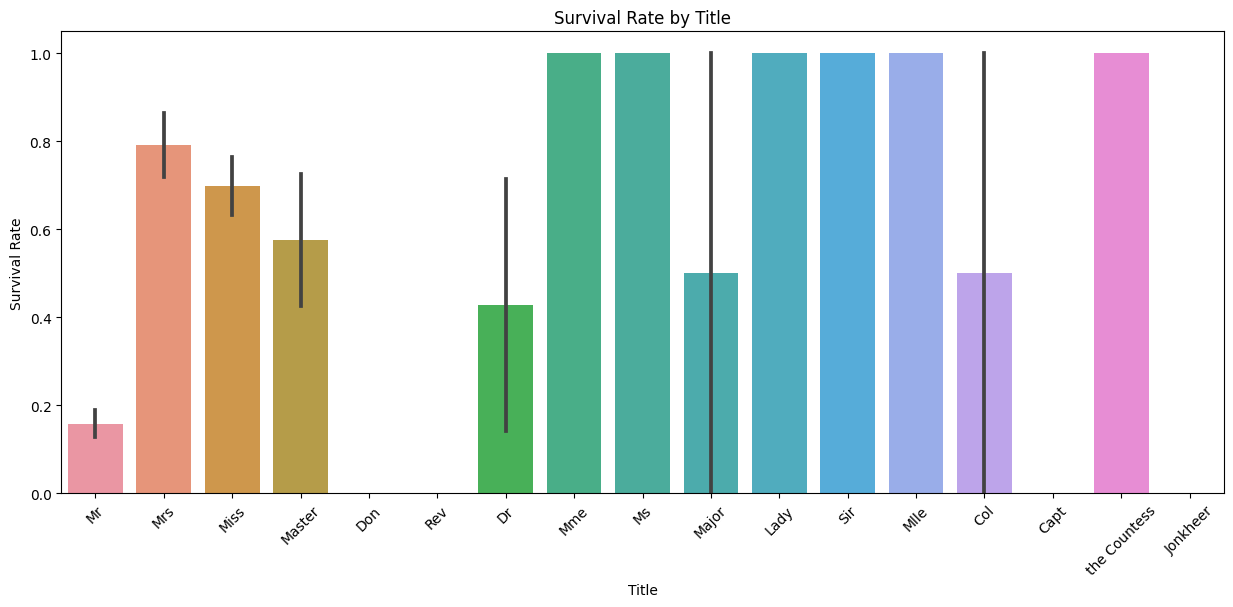

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the survival rate based on the 'Title' feature
plt.figure(figsize=(15, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.xticks(rotation=45)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


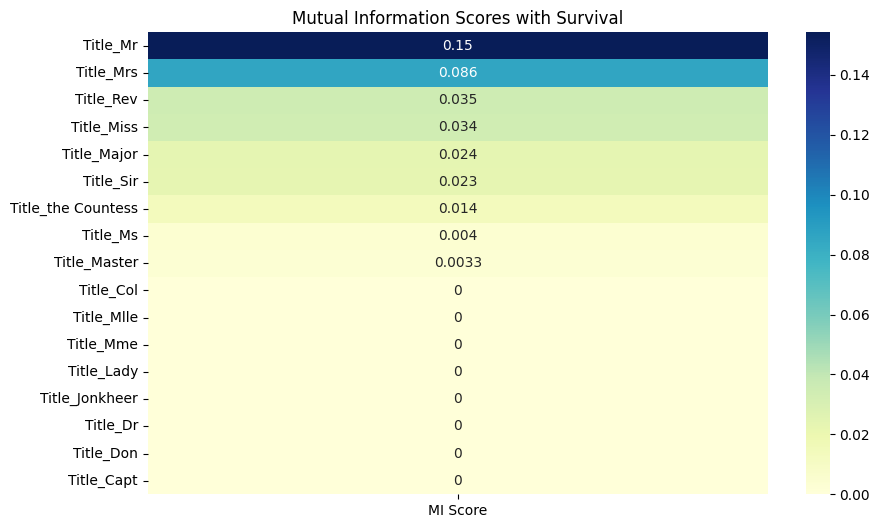

In [12]:
# 使用 OneHotEncoder 對 'Title' 進行編碼
one_hot_encoder = OneHotEncoder(sparse=False)
title_one_hot_encoded = one_hot_encoder.fit_transform(df[['Title']])

# 計算 MI scores
mi_scores = mutual_info_classif(title_one_hot_encoded, df['Survived'], random_state=42)

# 創建 DataFrame 以便更好的可視化
mi_scores_df = pd.DataFrame(mi_scores, index=one_hot_encoder.get_feature_names_out(['Title']), columns=["MI Score"])

# 繪製熱圖
plt.figure(figsize=(10, 6))
sns.heatmap(mi_scores_df.sort_values(by="MI Score", ascending=False), annot=True, cmap="YlGnBu")
plt.title("Mutual Information Scores with Survival")
plt.show()



柱子的高度：這代表了你的"平均測量值"，例如每個類別的平均生存率。

黑色線條：這代表了測量的不確定性或變異。如果線條很長，表示該類別的數據有較大的變異；如果線條很短，表示數據較為一致。

從上圖可以看到，不同稱謂的生存率有顯著差異。例如，稱謂為「Mr」的乘客生存率較低，而「Mrs」和「Miss」的生存率較高。這可能與當時「女士和孩子優先」的救援原則有關。

#### 家庭大小特徵（FamilySize）

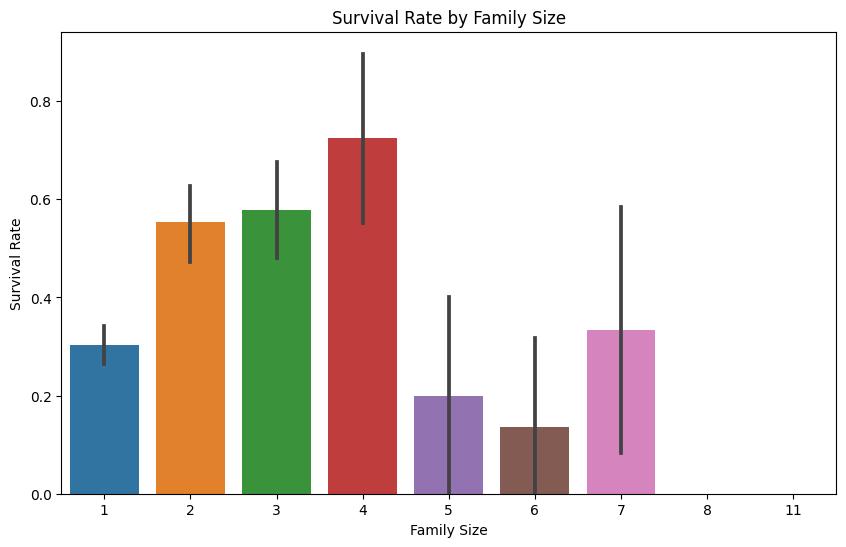

In [13]:
# Plotting the survival rate based on the 'FamilySize' feature
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()


從上圖可以看出，家庭大小與生存率之間存在一個特定的關係。單身乘客（家庭大小為1）的生存率較低，而家庭大小在2到4之間的乘客生存率較高。超過這個範圍的家庭大小似乎又使生存率下降。

這可能表明，有一些家庭成員的乘客可能更容易獲救，但過大的家庭則可能在撤離過程中遇到困難。

#### 船票特徵（TicketPrefix）

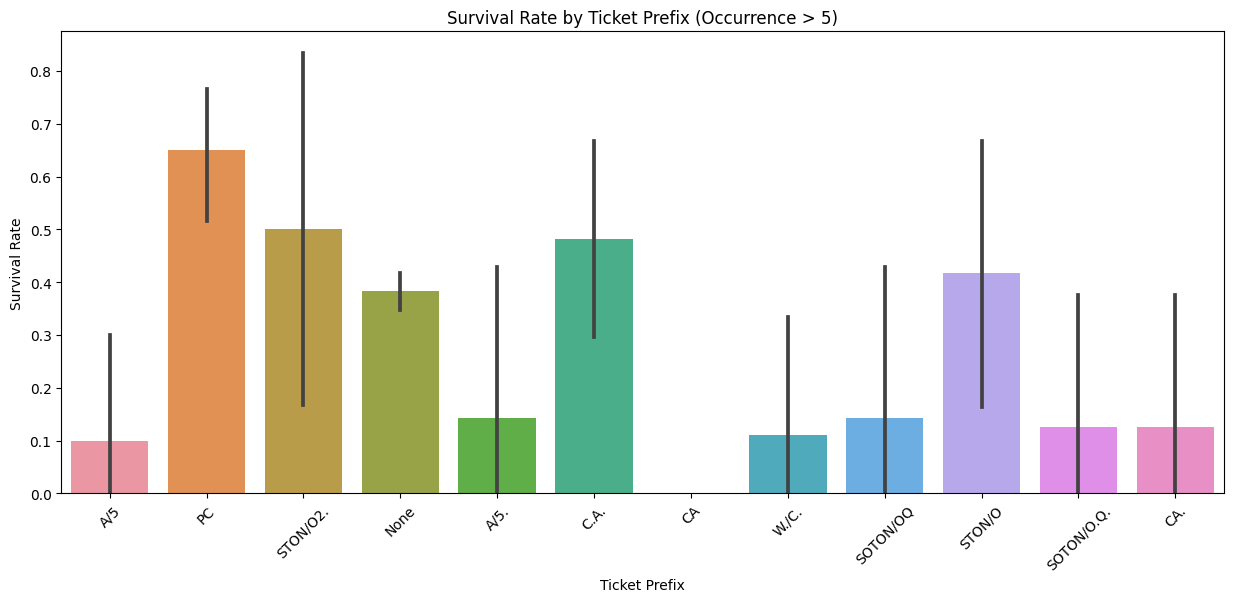

In [14]:
# Counting the occurrences of different ticket prefixes
ticket_prefix_counts = df['TicketPrefix'].value_counts()

# Selecting ticket prefixes that occur more than 5 times
selected_ticket_prefixes = ticket_prefix_counts[ticket_prefix_counts > 5].index

# Filtering the data to include only selected ticket prefixes
selected_ticket_prefix_data = df[df['TicketPrefix'].isin(selected_ticket_prefixes)]

# Plotting the survival rate based on the selected 'TicketPrefix' feature
plt.figure(figsize=(15, 6))
sns.barplot(x='TicketPrefix', y='Survived', data=selected_ticket_prefix_data)
plt.xticks(rotation=45)
plt.title('Survival Rate by Ticket Prefix (Occurrence > 5)')
plt.ylabel('Survival Rate')
plt.xlabel('Ticket Prefix')
plt.show()


上圖展示了不同船票前綴與生存率之間的關係。我們只選取了出現次數超過5次的前綴以進行分析。

可以看到，不同的船票前綴確實與生存率有一定的關聯。某些前綴（例如「PC」）的生存率相對較高，而其他前綴則相對較低。這可能與船票的類型、船艙位置或乘客的社會經濟地位有關。

# 根據優化分析結果對資料做最後處理

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
model_df = df.copy()
model_df.drop(columns = ['PassengerId', 'Cabin'], inplace = True)
model_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [16]:
# Filling missing values in the 'Age' column with different strategies
# age_mean_fill = df['Age'].fillna(df['Age'].mean()) # Filling with mean

model_df['Age'].fillna(model_df['Age'].mean(), inplace = True)
model_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [17]:
model_df['Sex'] = model_df['Sex'].replace({'male': 0, 'female': 1})
model_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C


In [18]:
# Using OneHotEncoder for 'Embarked' columns

embarked_dummies = pd.get_dummies(model_df['Embarked'], prefix='Embarked')

model_df.drop(columns = ['Embarked'], inplace=True)
model_df = pd.concat([model_df, embarked_dummies], axis=1)
model_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,0,1
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1,0,0


In [19]:
# Extracting title from the 'Name' column
model_df['Title'] = model_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Creating a family size feature by adding 'SibSp' and 'Parch' columns
model_df['FamilySize'] = model_df['SibSp'] + model_df['Parch'] + 1

# Extracting ticket prefix as a new feature
model_df['TicketPrefix'] = model_df['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'None')

model_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,TicketPrefix
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,0,1,Mr,2,A/5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,0,0,Mrs,2,PC
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss,1,STON/O2.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0,0,1,Mrs,2,None
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,0,1,Mr,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,0,1,Rev,1,None
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0,0,1,Miss,1,None
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,0,1,Miss,4,W./C.
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1,0,0,Mr,1,None


In [20]:
# Using OneHotEncoder for 'Title' and 'TicketPrefix' columns

title_dummies = pd.get_dummies(model_df['Title'], prefix='Title')
ticketPrefix_dummies = pd.get_dummies(model_df['TicketPrefix'], prefix='TicketPrefix')

new_columns = pd.DataFrame()

model_df.drop(columns = ['Title','Name','TicketPrefix','Ticket'], inplace=True)

model_df = pd.concat([model_df, title_dummies, ticketPrefix_dummies], axis = 1)
model_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,TicketPrefix_SOTON/O.Q.,TicketPrefix_SOTON/O2,TicketPrefix_SOTON/OQ,TicketPrefix_STON/O,TicketPrefix_STON/O2.,TicketPrefix_SW/PP,TicketPrefix_W./C.,TicketPrefix_W.E.P.,TicketPrefix_W/C,TicketPrefix_WE/P
0,0,3,0,22.000000,1,0,7.2500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,38.000000,1,0,71.2833,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,35.000000,1,0,53.1000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,35.000000,0,0,8.0500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
887,1,1,1,19.000000,0,0,30.0000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
888,0,3,1,29.699118,1,2,23.4500,0,0,1,...,0,0,0,0,0,0,1,0,0,0
889,1,1,0,26.000000,0,0,30.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Start to train the model
columns_X = set(model_df.columns) - {'Survived'}
columns_y = ['Survived']


train_X = model_df[columns_X]
train_y = model_df[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)

<ipython-input-21-b3a1b8de469d>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_X = model_df[columns_X]


[0.83240223 0.83146067 0.80337079 0.81460674 0.87078652]


# 總結
通過上述分析，我們可以得出以下結論：

多餘欄位：「PassengerId」和「Cabin」可能是多餘的，可以在分析中排除。

缺失值處理：對於「Age」欄位，使用中位數或平均數填補可能是合理的選擇。

非數值型欄位處理：使用LabelEncoder處理「Sex」和「Embarked」欄位是一個有效的策略。

特徵工程：通過創建「稱謂」、「家庭大小」和「船票前綴」特徵，我們可能可以增強模型的預測能力。

In [22]:
model_df.to_csv('model_df.csv', index=False, encoding='utf-8')
from google.colab import files

files.download('model_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 不同模型嘗試

- [決策樹](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=B6ChGPDjXpNr&line=1&uniqifier=1)
- [隨機森林](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=50a2yHrzXtqs)
- [XGBoost](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=pnCaSBfIvxPn)
- [SVM](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=Do_aTTQavtJ0)
- [神經網路](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=ok9UmXpvveWm&line=6&uniqifier=1)
- [貝葉斯優化](https://colab.research.google.com/drive/1Pstb20OCFqgsf8AK3ObnIGxO6hdt0PkF#scrollTo=Z_fvMGmnDD_W)






### 決策樹

In [23]:
# 導入所需的庫
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = model_df

# 分割數據集為訓練集和測試集
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化決策樹模型
decision_tree_model = DecisionTreeClassifier(random_state=42)

# 訓練模型
decision_tree_model.fit(X_train, y_train)

# 在測試集上預測
y_pred = decision_tree_model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7877094972067039

### 隨機森林

In [24]:
# 導入隨機森林分類器
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林模型
random_forest_model = RandomForestClassifier(random_state=42)

# 訓練模型
random_forest_model.fit(X_train, y_train)

# 在測試集上預測
y_pred_rf = random_forest_model.predict(X_test)

# 計算隨機森林的準確率
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.8324022346368715

### XGBoost

In [25]:
# 導入XGBoost分類器
from xgboost import XGBClassifier

# 初始化XGBoost模型
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 訓練模型
xgboost_model.fit(X_train, y_train)

# 在測試集上預測
y_pred_xgb = xgboost_model.predict(X_test)

# 計算XGBoost的準確率
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.8100558659217877

#### 全搜索GridSearch

In [26]:
# 導入GridSearchCV
from sklearn.model_selection import GridSearchCV

# 定義要搜索的超參數和範圍
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# 初始化XGBoost模型
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 創建Grid Search對象
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# 執行Grid Search
grid_search.fit(X_train, y_train)

# 獲取最佳參數
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.7}

learning_rate（學習率）：它控制了每棵樹對最終預測的貢獻。較小的學習率通常需要更多的樹，但可能提供更好的性能。

n_estimators（估計器數量）：模型中樹的數量。

max_depth（最大深度）：樹的最大深度。較深的樹可以捕捉更多細節，但可能過擬合。

min_child_weight（最小子節點權重）：控制樹的葉子節點的分割。較大的值可以防止過擬合。

subsample：用於訓練每棵樹的樣本比例。這有助於防止過擬合。

colsample_bytree：用於訓練每棵樹的特徵比例。這也有助於防止過擬合。

In [28]:
# 使用最佳超參數訓練XGBoost模型
best_xgb_model = XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.01,
    max_depth=7,
    min_child_weight=1,
    n_estimators=150,
    subsample=0.7,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 擬合訓練數據
best_xgb_model.fit(X_train, y_train)

# 在測試數據集上進行預測
y_pred = best_xgb_model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8212290502793296

#### 隨機搜索RandomizedSearch

In [30]:
# 導入RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 初始化隨機搜索對象
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=1, random_state=42, scoring='accuracy')

# 執行隨機搜索
random_search.fit(X_train, y_train)

# 獲取最佳參數
best_params_random = random_search.best_params_
best_params_random


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'subsample': 0.7,
 'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

In [32]:
# 使用最佳超參數訓練XGBoost模型
best_xgb_model = XGBClassifier(
  subsample=0.7,
  n_estimators=100,
  min_child_weight=3,
  max_depth=5,
  learning_rate=0.01,
  colsample_bytree=0.7
)

# 擬合訓練數據
best_xgb_model.fit(X_train, y_train)

# 在測試數據集上進行預測
y_pred = best_xgb_model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8100558659217877

#### SVM

In [35]:
# 導入SVM和必要的庫
from sklearn.svm import SVC

data_svm = data.copy()

# 分割特徵和標籤
X_svm = data_svm.drop(columns=['Survived'])
y_svm = data_svm['Survived']

# 分割訓練集和測試集
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

# 初始化SVM模型
svm_model = SVC()

# 擬合訓練數據
svm_model.fit(X_train_svm, y_train_svm)

# 在測試數據集上進行預測
y_pred_svm = svm_model.predict(X_test_svm)

# 計算SVM模型的準確率
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
accuracy_svm


0.664804469273743

## 神經網路

In [38]:
# 導入必要的庫
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 讀取數據集
data_nn = data.copy()
X_nn = data_nn.drop(columns=['Survived'])
y_nn = data_nn['Survived']

# 分割訓練集和測試集
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# 特徵縮放
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

# 轉換為PyTorch張量
X_train_tensor = torch.tensor(X_train_nn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_nn.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_nn.values, dtype=torch.float32).view(-1, 1)

# 創建數據加載器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定義神經網絡結構
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 1)
        self.layer4 = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

# 初始化神經網絡
input_dim = X_train_nn.shape[1]
model_nn = SimpleNN(input_dim)

# 定義損失函數和優化器
loss_function = nn.BCELoss()
optimizer = optim.Adam(model_nn.parameters(), lr=0.001)

# 訓練神經網絡
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        # 預測和計算損失
        y_pred = model_nn(X_batch)
        loss = loss_function(y_pred, y_batch)

        # 反向傳播和優化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

print('Training complete!')


Epoch 1/100, Loss: 0.5284909009933472
Epoch 2/100, Loss: 0.5207663774490356
Epoch 3/100, Loss: 0.5143373012542725
Epoch 4/100, Loss: 0.524842381477356
Epoch 5/100, Loss: 0.48960256576538086
Epoch 6/100, Loss: 0.3702661693096161
Epoch 7/100, Loss: 0.2780523896217346
Epoch 8/100, Loss: 0.5894671082496643
Epoch 9/100, Loss: 0.2402598261833191
Epoch 10/100, Loss: 0.4250255525112152
Epoch 11/100, Loss: 1.0316076278686523
Epoch 12/100, Loss: 0.21819573640823364
Epoch 13/100, Loss: 0.3453899919986725
Epoch 14/100, Loss: 0.28716710209846497
Epoch 15/100, Loss: 0.226557657122612
Epoch 16/100, Loss: 0.6265144944190979
Epoch 17/100, Loss: 0.3008670508861542
Epoch 18/100, Loss: 0.31262147426605225
Epoch 19/100, Loss: 0.2191990613937378
Epoch 20/100, Loss: 0.1740494668483734
Epoch 21/100, Loss: 0.3749848008155823
Epoch 22/100, Loss: 0.13560163974761963
Epoch 23/100, Loss: 0.33870670199394226
Epoch 24/100, Loss: 0.24360224604606628
Epoch 25/100, Loss: 0.3465110659599304
Epoch 26/100, Loss: 0.4055415

In [39]:
# 將模型設置為評估模式
model_nn.eval()

# 初始化變量以跟踪正確預測的數量和總數量
correct_predictions = 0
total_predictions = 0

# 禁用梯度計算
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        # 進行預測
        predictions = model_nn(X_batch)

        # 將預測轉換為二元標籤
        predicted_labels = (predictions > 0.5).float()

        # 比較預測標籤與真實標籤
        correct_predictions += (predicted_labels == y_batch).sum().item()
        total_predictions += y_batch.size(0)

# 計算準確率
accuracy = correct_predictions / total_predictions

# 打印準確率
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 81.56%


### 神經網絡與網格搜索
對於神經網絡，使用網格搜索（grid search）來調參可能非常耗時和計算密集，特別是當參數空間很大時。一個替代方案是使用隨機搜索（random search），或者更先進的超參數優化方法，如Bayesian Optimization。

### 貝葉斯優化

Bayesian Optimization是一種基於概率模型的全局優化算法，用於找到目標函數的最大（或最小）值。它在許多機器學習和深度學習任務中用於超參數調整，因為它具有以下優勢：

效率：相比於網格搜索和隨機搜索，Bayesian Optimization通常需要探索更少的參數組合就能找到良好的解。

智能搜索：通過建立目標函數的概率模型，它可以智能地選擇下一個要評估的參數組合，而不是隨機或均勻選擇。

利用先前信息：它使用先前的評估結果來指導後續的搜索，因此能更快地找到最佳解。
適用於高維和連續空間：可以有效處理高維超參數空間，並且對於連續參數尤為有效。

In [42]:
!pip install scikit-optimize
!pip install skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.0 MB/s eta 0:00:00


In [46]:
from skopt import BayesSearchCV
from skorch import NeuralNetBinaryClassifier  # 用於二元分類
import torch.nn as nn

# 定義神經網絡結構
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 1)
        self.layer4 = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

# 使用skorch包裝PyTorch模型
net = NeuralNetBinaryClassifier(  # 使用二元分類器
    SimpleNN(input_dim=X_train_nn.shape[1]),
    max_epochs=10,
    lr=0.1,
    batch_size=32,
    criterion=nn.BCELoss  # 使用二元交叉熵損失
)




# 定義要搜索的超參數範圍
param_space = {
    'lr': (1e-5, 1e-1, 'log-uniform'),
    'batch_size': [16, 32, 64, 128],
}

X_train_nn = X_train_nn.astype('float32')
y_train_nn = y_train_nn.astype('float32')
# y_train_nn = y_train_nn.reshape(-1, 1).astype('float32')


# 使用BayesSearchCV進行Bayesian Optimization
bayes_search = BayesSearchCV(net, param_space, n_iter=32, cv=3, n_jobs=-1)
bayes_search.fit(X_train_nn, y_train_nn)

# 打印最佳超參數
print("Best hyperparameters found: ", bayes_search.best_params_)


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6385       0.8112        0.5590  0.0615
      2        0.4905       0.8112        0.4719  0.0514
      3        0.4204       0.8042        0.4514  0.0448
      4        0.3972       0.7972        0.4464  0.0453
      5        0.3854       0.7832        0.4465  0.0454
      6        0.3778       0.7832        0.4474  0.0493
      7        0.3725       0.7902        0.4515  0.0498
      8        0.3686       0.7902        0.4557  0.0484
      9        0.3652       0.7972        0.4592  0.0527
     10        0.3625       0.7972        0.4629  0.0465
Best hyperparameters found:  OrderedDict([('batch_size', 16), ('lr', 0.1)])


In [49]:
# 使用最佳超參數創建模型
net_best = NeuralNetBinaryClassifier(
    SimpleNN(input_dim=X_train_nn.shape[1]),
    max_epochs=10,
    lr=0.1, # 最佳學習速率
    batch_size=16, # 最佳批次大小
    criterion=nn.BCELoss
)

# 訓練模型
net_best.fit(X_train_nn, y_train_nn)

# 在測試集上進行評估
from sklearn.metrics import accuracy_score

X_test_nn = X_test_nn.astype('float32')
y_pred = net_best.predict(X_test_nn)
accuracy = accuracy_score(y_test_nn, y_pred)
print("Test Accuracy:", accuracy)

# （可選）進一步分析和解釋模型

# 使用模型進行預測
# new_data_predictions = net_best.predict(new_data)


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6130       0.8112        0.5345  0.0510
      2        0.4724       0.8322        0.4609  0.0441
      3        0.4159       0.8182        0.4409  0.0499
      4        0.3945       0.8112        0.4351  0.0459
      5        0.3831       0.8042        0.4337  0.0478
      6        0.3758       0.8042        0.4338  0.0481
      7        0.3706       0.7972        0.4352  0.0506
      8        0.3667       0.7972        0.4377  0.0464
      9        0.3635       0.7902        0.4395  0.0488
     10        0.3606       0.7972        0.4418  0.0478
Test Accuracy: 0.8044692737430168


以下是可能導致優化後準確率下降的一些原因，並且我將嘗試以一個象征性的比喻來解釋這個現象：

過度依賴交叉驗證集：如果交叉驗證集和測試集之間存在差異，則在交叉驗證集上找到的最佳超參數可能不一定在測試集上表現最佳。就像你正在尋找一把通用的鑰匙來打開許多不同的鎖，但是在某些特定的鎖上，通用鑰匙可能不如專門為那個鎖設計的鑰匙有效。

搜索空間的選擇：如果你選擇的超參數範圍不合適，則可能會錯過一些真正有用的超參數組合。就像在尋找一個寶藏時，如果你的地圖劃定的區域不正確，那麼即使你的搜索策略多麼精確，也可能找不到寶藏。

隨機性和噪聲：某些模型和數據集可能具有隨機性或噪聲，這可能影響超參數搜索的結果。就像在風暴中導航，即使你的指南針非常精確，風和浪也可能讓你偏離正確的路徑。

模型的基本假設和數據質量：有時，選擇的模型和超參數可能無法捕捉數據的真實模式。這就像用一個過於簡單的方程式來描述一個非常複雜的現象，無論你如何調整方程的參數，都無法完全捕捉現象的所有細節。

解決方案可能包括擴展搜索空間、使用不同的模型、更仔細地清理和處理數據等。

模型性能的微小波動在許多情況下都是正常的，特別是當使用的數據集較小或具有噪聲時。有時，這些波動可能僅是隨機變異的結果，而不是任何實質性問題的跡象。